In [207]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
!pip install pandas
!pip install scikit-image

import sys
sys.path.append("../")

import numpy as np
import pandas as pd
from chart import show

In [209]:
landmarks = pd.read_csv("csv/ABIAS.csv")
x = landmarks[[col for col in landmarks.columns if "_x" in col]].T
y = landmarks[[col for col in landmarks.columns if "_y" in col]].T

In [210]:
x

,0,1,2,3,4,5,6,7,8,9,...,773,774,775,776,777,778,779,780,781,782
hand_0_wrist_x,0.430396,0.431362,0.431172,0.431301,0.431106,0.431280,0.430894,0.430974,0.430986,0.430979,...,0.426949,0.426774,0.427353,0.428355,0.427854,0.427915,0.428163,0.429085,0.428928,0.422332
hand_0_thumb_cmc_x,0.460859,0.461214,0.461018,0.460570,0.460437,0.460395,0.460254,0.460259,0.460189,0.460320,...,0.456528,0.456546,0.456446,0.458171,0.457181,0.457934,0.458219,0.459287,0.458531,0.451106
hand_0_thumb_mcp_x,0.478049,0.477162,0.477110,0.476728,0.476434,0.476577,0.476337,0.476462,0.476271,0.476421,...,0.472451,0.472582,0.471656,0.473981,0.472713,0.473950,0.473706,0.475193,0.474251,0.467268
hand_0_thumb_ip_x,0.490347,0.488779,0.488509,0.488161,0.487796,0.488023,0.487716,0.487963,0.487713,0.487914,...,0.483486,0.483918,0.482401,0.485569,0.483756,0.485389,0.484660,0.486796,0.485360,0.477800
hand_0_thumb_tip_x,0.499638,0.497930,0.497526,0.497200,0.496755,0.497180,0.496715,0.497095,0.496764,0.496908,...,0.492643,0.493283,0.491072,0.495035,0.492627,0.494705,0.493315,0.496190,0.494344,0.486221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose_left_ankle_x,0.412198,0.412202,0.411374,0.411374,0.411158,0.411101,0.410781,0.410677,0.410585,0.410582,...,0.415779,0.416553,0.416799,0.416711,0.416699,0.416681,0.416639,0.416377,0.416191,0.409686
pose_right_heel_x,0.547717,0.547663,0.546284,0.546182,0.545911,0.545874,0.545398,0.545372,0.545358,0.545488,...,0.556371,0.556694,0.556911,0.556940,0.556982,0.556992,0.557000,0.556906,0.556847,0.544901
pose_left_heel_x,0.408671,0.408729,0.408194,0.408206,0.408099,0.408089,0.407936,0.407903,0.407860,0.407859,...,0.413891,0.414801,0.415017,0.414879,0.414857,0.414827,0.414766,0.414458,0.414241,0.407730
pose_right_foot_index_x,0.526476,0.526694,0.526341,0.526402,0.526376,0.526420,0.526253,0.526251,0.526244,0.526326,...,0.539193,0.539361,0.539456,0.539378,0.539364,0.539218,0.539042,0.538557,0.538146,0.526802


In [211]:
y

,0,1,2,3,4,5,6,7,8,9,...,773,774,775,776,777,778,779,780,781,782
hand_0_wrist_y,0.788411,0.784486,0.785288,0.785288,0.785692,0.785960,0.785896,0.786226,0.786114,0.786165,...,0.809101,0.808526,0.805592,0.803393,0.802599,0.801605,0.802278,0.800659,0.800622,0.778855
hand_0_thumb_cmc_y,0.792772,0.790153,0.790359,0.791003,0.791008,0.791598,0.791341,0.792009,0.791924,0.791620,...,0.813515,0.813494,0.809873,0.808825,0.807216,0.808061,0.807223,0.805393,0.805382,0.783511
hand_0_thumb_mcp_y,0.775613,0.773247,0.773169,0.773780,0.773852,0.774272,0.774157,0.774984,0.774776,0.774483,...,0.794831,0.794730,0.791304,0.790506,0.788950,0.791339,0.789584,0.787819,0.787750,0.764810
hand_0_thumb_ip_y,0.765441,0.762131,0.761437,0.761953,0.761945,0.762445,0.762290,0.763302,0.763117,0.762715,...,0.781737,0.781628,0.777865,0.777930,0.776287,0.780258,0.777215,0.775909,0.775447,0.751865
hand_0_thumb_tip_y,0.755754,0.751750,0.749903,0.750262,0.750294,0.750558,0.750684,0.751621,0.751429,0.750957,...,0.769730,0.769929,0.767003,0.766279,0.764851,0.768944,0.765723,0.764814,0.764286,0.738719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose_left_ankle_y,1.701363,1.723281,1.735408,1.739057,1.741169,1.741578,1.742700,1.744249,1.744496,1.745412,...,1.820949,1.820879,1.820916,1.821030,1.821050,1.820967,1.820958,1.821044,1.821217,1.821118
pose_right_heel_y,1.761487,1.773882,1.783530,1.786794,1.789641,1.790138,1.791283,1.792703,1.792964,1.794008,...,1.860383,1.860246,1.860258,1.860235,1.859948,1.859436,1.859241,1.859214,1.859237,1.860435
pose_left_heel_y,1.752989,1.772637,1.784413,1.787939,1.789766,1.790137,1.791009,1.792408,1.792521,1.793516,...,1.867431,1.867378,1.867473,1.867702,1.867731,1.867754,1.867787,1.867996,1.868292,1.868167
pose_right_foot_index_y,1.825754,1.842400,1.852564,1.856788,1.859626,1.859770,1.860804,1.862384,1.862986,1.864451,...,1.940643,1.939819,1.939833,1.939875,1.939808,1.939613,1.939591,1.939599,1.939652,1.939652


In [212]:
x = x.to_numpy()
y = y.to_numpy()

## Pipeline

![Example Image](img/fig_paper.png)


In [213]:
print(f"N={x.shape[0]} (#landmarks)\nM={x.shape[1]} (#frames)")

N=541 (#landmarks)
M=783 (#frames)


### Implementation using split/stack

In [214]:
X = np.array_split(x, x.shape[1] // 3, axis=1)
X = np.stack(X, axis=1)
Y = np.array_split(y, y.shape[1] // 3, axis=1)
Y = np.stack(Y, axis=1)
X.shape

(541, 261, 3)

In [215]:
I = np.concatenate([X, Y], axis=1)

In [216]:
print(I.shape)

(541, 522, 3)


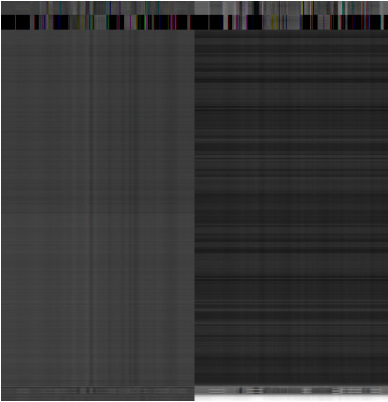

In [217]:
# Normalization
I -= I.min()
I /= I.max()
show(I, scale=0.1)

### Implementation using reshape

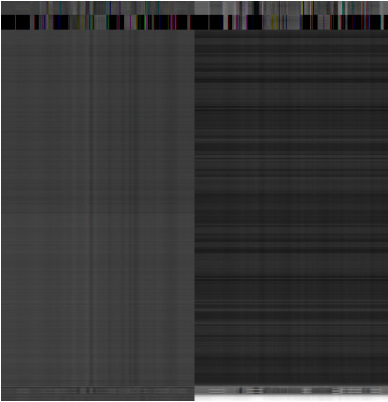

In [218]:
X = np.reshape(x, (x.shape[0], -1, 3))
Y = np.reshape(y, (y.shape[0], -1, 3))
I2 = np.concatenate([X, Y], axis=1)

# Normalization
I2 -= I2.min()
I2 /= I2.max()
show(I2, scale=0.1)

In [221]:
np.all(I == I2)

True

In [223]:
landmarks = pd.read_csv("csv/ABIATAR.csv")
x = landmarks[[col for col in landmarks.columns if "_x" in col]].T.to_numpy()
y = landmarks[[col for col in landmarks.columns if "_y" in col]].T.to_numpy()

def landmarks_to_image(x, y, n=3, normalize=False):
    # Remove cols until the width is multiple of n
    width = x.shape[1]
    if width % n != 0:
        extra_cols = width % n
        x = x[:, : width - extra_cols]
        y = y[:, : width - extra_cols]

    X = np.reshape(x, (x.shape[0], -1, n))
    Y = np.reshape(y, (y.shape[0], -1, n))
    I = np.concatenate([X, Y], axis=1)
    return I

y.shape
I = landmarks_to_image(x, y, n=3, normalize=True)
# # Normalization

# show(I, scale=0.1)

In [ ]:
x

[array([[0.4351778 , 0.43722045],
        [0.46421278, 0.46362281],
        [0.48162889, 0.47991842],
        ...,
        [0.42812592, 0.43011102],
        [0.54370707, 0.54906857],
        [0.4505319 , 0.4548327 ]]),
 array([[0.4381783 , 0.43831962],
        [0.46567801, 0.46603376],
        [0.48186621, 0.48217243],
        ...,
        [0.43494931, 0.43975106],
        [0.55683815, 0.56055987],
        [0.46268025, 0.46742445]]),
 array([[0.43846056, 0.4382247 ],
        [0.46522006, 0.46485886],
        [0.48147824, 0.48093322],
        ...,
        [0.43889698, 0.43720832],
        [0.55892342, 0.55853498],
        [0.46525425, 0.46435031]]),
 array([[0.43784428, 0.43739271],
        [0.46493953, 0.46409532],
        [0.48119488, 0.48071226],
        ...,
        [0.436095  , 0.43543306],
        [0.55728179, 0.55639452],
        [0.46271402, 0.46165806]]),
 array([[0.43794492, 0.43793496],
        [0.46497971, 0.46472812],
        [0.481419  , 0.48129687],
        ...,
        [

In [ ]:
x = np.arange(16).reshape((4, 4))
print(x)
x.reshape((x.shape[0], -1, 2))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15]]])